In [14]:
'''
Program to Show the implementation of a Supply Chain through the use of object oriented programming.

Subsequent implementation of a Reinforcement learning algorithmmto identofy the best policies.

Daniel Sepulveda Estay
Technical University of Denmark, 2020
'''

import numpy as np

# define global system variable
HOLDING_COST = 2
PURCHASNG_COST = 50
SALES_PRICE = 100

In [15]:
# define global target variables
s1_total_demand = [] # demand
s1_total_clock = [] # time
s1_total_inventory = [] # total inventory
s1_total_revenue = [] # average revenue

In [16]:
# Object orientated programming

class Simulation:
    '''
    A Simulation Class defines a supply chain simulation functions
        __init__
        advance_time
        handle_customer_event
        handle_delivery_event
        generate_interrival
        generate_delivery
    '''
    def __init__(self, order_cutoff, order_target):
        ''' 
        This function initializes the Simulation, by taking inputs of (s,S)
        s = Order cutoff, which the amount of inventory when a new order is generated
        S = Order target, which is the objective inventory
        '''
        self.inventory = order_target # The inventory is intially the target
        self.num_ordered = 0 # initially, no orders have been placed
        self.clock = 0 # reset the simulation clock
        self.demand = 0 # Initially there is no demand
        self.t_customer = self.generate_interarrival() # define the time for the first customer order
        self.t_delivery = float('inf') # Initially delivery time is extrememly high
        self.revenue = 0 # Initially zero total income
        self.cost_orders = 0 
        self.cost_holding = 0
        self.order_cutoff = order_cutoff # s is assigned
        self.order_target = order_target # S is assigned
        
    def advance_time(self):
        '''
        This function will advance the time of the simulation until, the next event.
        The possible next events are either
            a.- the arrival of a new customer at t_customer
            b.- the arrivalof a delivery of material at t_delivery
        During this time advancement, costs are calculated
            a.- Holding Costs
            (b.- Backlog Costs)
        '''
        t_event = min(self.t_customer, self.t_delivery)
        self.cost_holding += self.inventory*HOLDING_COST*(t_event-self.clock)
        self.clock = t_event
        #The next event is identified and enacted. Either attend a customer or a delivery
        if self.t_delivery <= self.t_customer:
            self.handle_delivery_event()
        else:
            self.handle_customer_event()
    
    def handle_customer_event(self):
        '''
        This function manages a customer by delivering the maximum amount between what 
        the customer wants and the available amount in stock.
        '''
        demand = self.generate_demand() # create demand for this customer
        self.demand = demand
        if self.inventory > demand :
            self.revenue += SALES_PRICE*demand
            self.inventory -= demand
        else:
            self.revenue += 100*self.inventory
            self.inventory = 0
            
        if self.inventory < self.order_cutoff and self.num_ordered == 0:
            self.num_ordered = self.order_target - self.inventory
            self.cost_orders += 50*self.num_ordered
            self.t_delivery = self.clock + 2
            
        self.t_customer = self.clock + self.generate_interarrival()
    
    def handle_delivery_event(self):
        '''
        This function handles the delivery of material by:
        a.- Increasing inventory
        b.- Reseting the num_ordered variable  
        '''
        self.inventory += self.num_ordered
        self.num_ordered = 0
        self.t_delivery = float('inf')
        
    def generate_interarrival(self):
        '''
        This function returns a interarrival time according to an exponential distribution
        '''
        return np.random.exponential(1./5.0)
    
    def generate_demand(self):
        '''
        This function returns a demand distributed normally between 1 and 5
        '''
        return int(np.random.normal(4,2))
    
np.random.seed(0)

s1 = Simulation(30, 1000)

mins1 = 5
maxs1 = 30
minS1 = 10
maxS1 = 200

while s1.clock <= 1000.0:
    s1.advance_time()
    s1_total_demand.append(s1.demand)
    s1_total_clock.append(s1.clock)
    s1_total_inventory.append(s1.inventory)
    s1_total_revenue.append(s1.revenue/s1.clock)

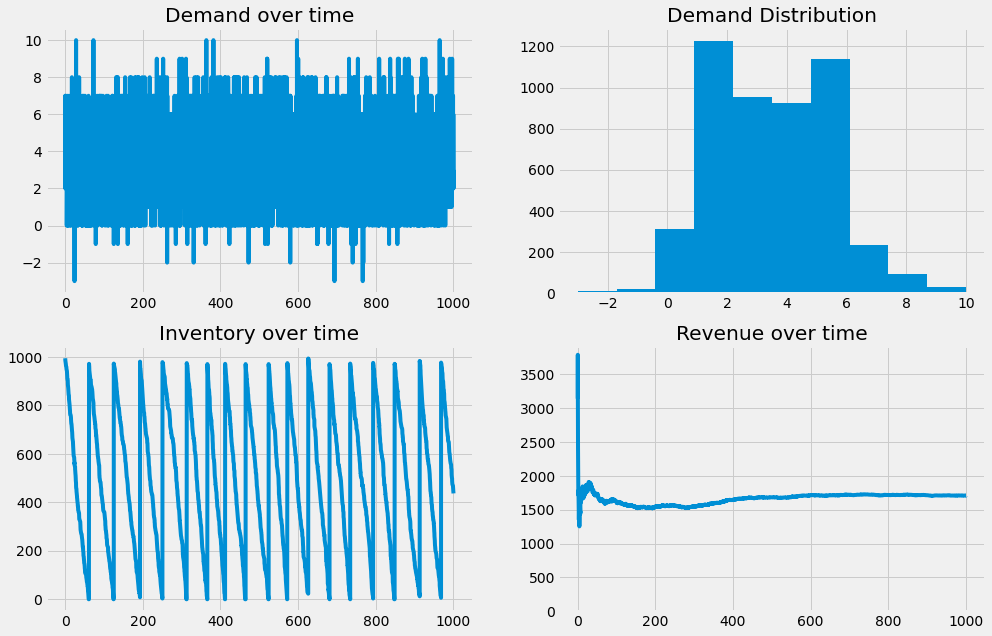

In [17]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(15, 10))


ax1 = fig.add_subplot(221)
ax1.plot(s1_total_clock, s1_total_demand)
ax1.title.set_text("Demand over time")

ax2 = fig.add_subplot(222)
ax2.hist(s1_total_demand)
ax2.title.set_text("Demand Distribution")

ax3 = fig.add_subplot(223)
ax3.plot(s1_total_clock, s1_total_inventory)
ax3.title.set_text("Inventory over time")

ax4 = fig.add_subplot(224)
ax4.plot(s1_total_clock, s1_total_revenue)
ax4.title.set_text("Revenue over time")
ax4.set_ylim(ymin=0)

plt.show()